In [3]:
!pip install -U mxnet-cu100 gluoncv==0.7.0

     |████████████████████████████████| 827.8MB 15kB/s 
     |████████████████████████████████| 757kB 51.4MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [ ]:
!python train_ssd_custom.py --gpus 0 --batch-size 10 --epochs 5

In [5]:
from mxnet import gluon
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import gluoncv as gcv
import numpy as np

In [6]:
net = gcv.model_zoo.get_model('ssd_300_vgg16_atrous_custom', pretrained_base=False, norm_layer=gluon.nn.BatchNorm, classes = np.array(['bleeding_site']))
net.load_parameters('ssd_300_vgg16_atrous_custom_best.params')

In [10]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [8]:
im_fname1 = '1_5.tif'
im_fname2 = '1_7.tif'
im_fname3 = '1_9.tif'
im_fname4 = '1_11.tif'
im_fname5 = '1_13.tif'
im_fname6 = '1_15.tif'
im_fname7 = '1_17.tif'
im_fname8 = '1_21.tif'
im_fname9 = '1_23.tif'
im_fname10 = '1_25.tif'
im_fname11 = '1_27.tif'
im_fname12 = '1_29.tif'
im_fname13 = '1_31.tif'
im_fname14 = '1_33.tif'
im_fname15 = '1_35.tif'
im_fname16 = '1_37.tif'
imgList = [im_fname1, im_fname2, im_fname3, im_fname4, im_fname5, im_fname6, im_fname7, im_fname8, im_fname9, im_fname10, im_fname11, im_fname12, im_fname13, im_fname14, im_fname15, im_fname16]
x, img = data.transforms.presets.ssd.load_test(im_fname5, short=300)
print('Shape of pre-processed image:', x[0].shape)

Shape of pre-processed image: (3, 300, 300)


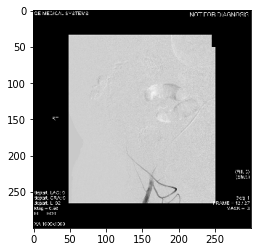

In [26]:
#for i in range(0, 16):
#x, img = data.transforms.presets.ssd.load_test(im_fname1, short=300)
class_IDs, scores, bounding_boxes = net(x)
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                            class_IDs[0], class_names=net.classes)
plt.show()

In [27]:
print(bounding_boxes[0])
print(scores[0])


[[ 86.4149     91.88018    96.416046  105.639244 ]
 [ 86.48099   100.18085    97.13887   113.726364 ]
 [166.47986    98.1559    176.54562   113.714035 ]
 [118.697044   69.66521   129.02841    83.772934 ]
 [ -8.460949  278.69675    11.650572  291.77023  ]
 [199.63976   240.95648   209.29536   254.30557  ]
 [207.95334   238.81407   217.78275   253.05937  ]
 [126.531364   69.993546  136.89862    84.46123  ]
 [ 94.882645   85.036476  104.317245   99.01548  ]
 [158.27837    98.87873   169.07698   113.75761  ]
 [267.89807    92.54688   340.38562   262.25043  ]
 [150.48532   153.89156   185.08322   211.29286  ]
 [164.00533   159.28548   178.01768   170.30675  ]
 [-30.64645    -4.4005632  49.85335    23.520493 ]
 [273.95538   274.0248    317.02728   315.62564  ]
 [ -3.5075245 257.69785    21.512846  331.3812   ]
 [166.25777   154.66591   201.73256   211.84258  ]
 [ -1.9505291 -30.538084   21.691187   41.830193 ]
 [-25.733948   64.30207   352.09058   238.10077  ]
 [-14.130865  277.6527     30.

In [12]:
!python crowd_vote.py